# KNN Theory

K Nearest Neighbors is a **classification** algorithm that operates on a very simple principle. 

Imagine we had some imaginary data on Dogs and Horses, with heights and weights. 

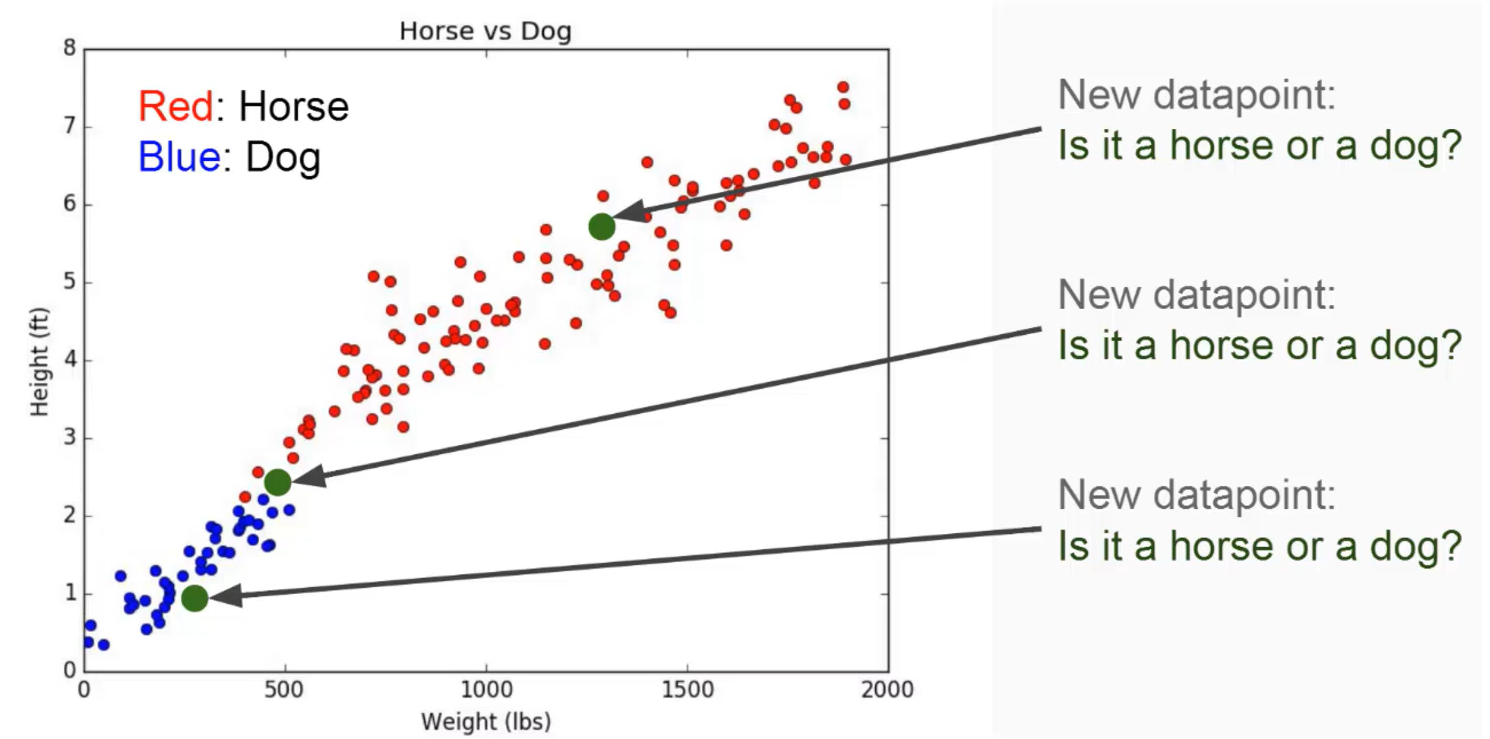

In [1]:
from IPython.display import Image 
Image(filename='Horse_v_Dog_plot.PNG')

What we want to be able to do is predict if new data is a dog or a horse. 

Trainging Algorithm:
1. Store all the data

Prediction Algorithm:
1. Calculate the distance from x to all the points in your data
2. Sort the points in your data by increasing distance from x
3. Predict the majority label of the "k" closest points

Choosing different k values can impact the class a new point is assigned to. 

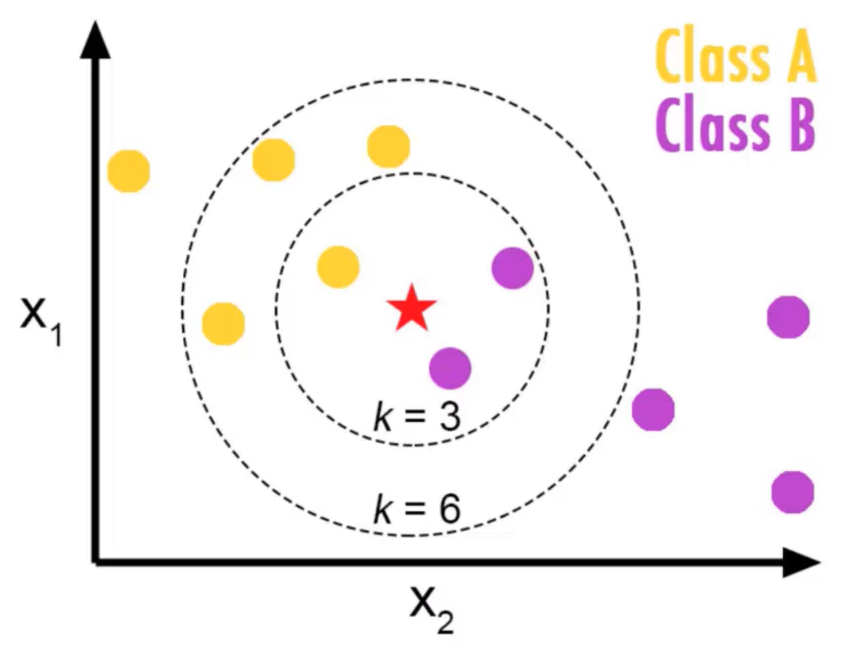

In [2]:
Image(filename = 'k_value_different_class.PNG')

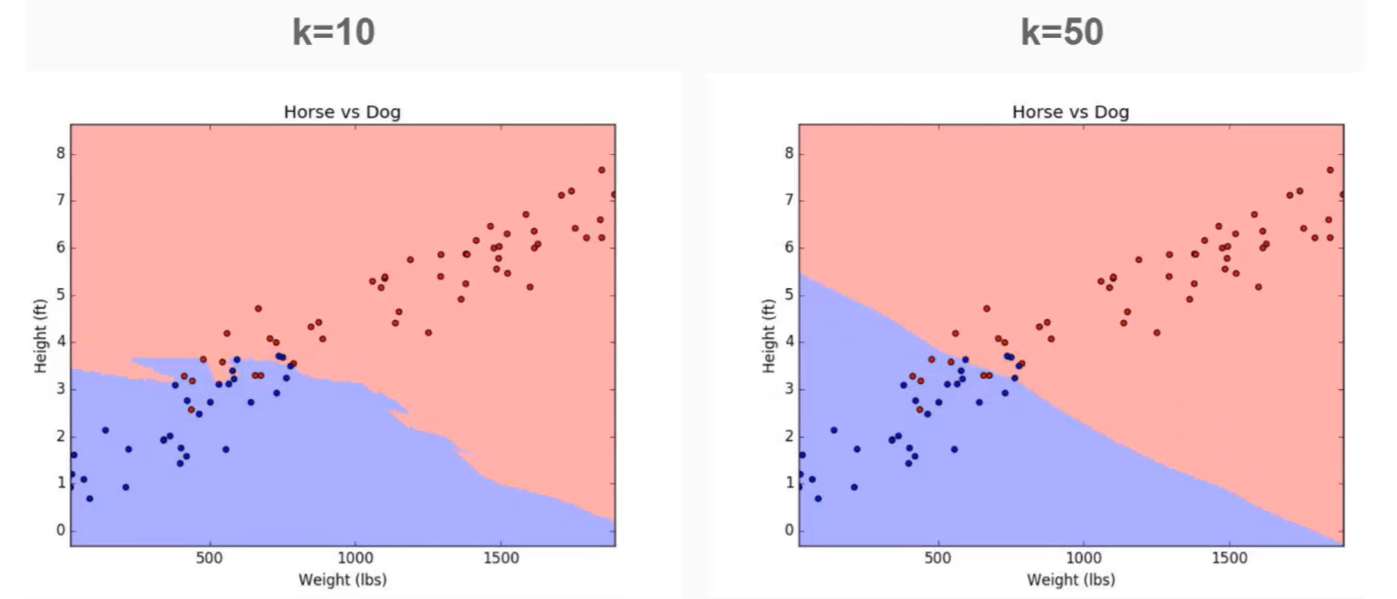

In [3]:
Image(filename = 'k_value_noise.PNG')

A larger k-value also smoothes out the decisions. Low values of k create noise. However, notice that the high k-values also has some errors. Cleaner cutoff, but some points are mislabeled. 

KNN Pros:
- Very simple
- Training is trivial
- Works with any number of classes
- Easy to add more data 
- Few parameters (K, distance metric)

KNN Cons:
- High Prediction Cost (worse for large data sets)
- Not good with high dimensional data
- Categorical Features do not work well

# KNN with Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In data science interviews, often times they will give you data where the columns are not labeled. For example, the Classified Data here.

In [4]:
df = pd.read_csv('Classified Data', index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


The column names are random letters so we don't know what the column names mean and we don't know what the numbers mean. Although we can still use this information to predict the Target Class. 

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variable actually matters a lot and any variables that are on a large scale will have a much larger effect on the distance between observations. 

Because of this, when you are using KNN as a classifier, you are going to want to standardize everything to the same scale. 

sklearn has a lot of built in tools to help with this. 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
# We don't want to fit to the target class, so we drop it. Axis = 1 
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can use the scaler object to perform a transformation. The transform() method Performs standardization by centering and scaling.

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
# These are the scaled values of the original data
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

We can now use the scaled feature values to create a scaled dataframe (notive the output was an array). 

In [12]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [13]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


And now we have a standard scale or standarized verion of our data, which is now ready to be fed into a machine learning algorithm.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now we can use KNN. Remember that we are trying to come up with a model to predict whether someone will be inside that target class or not. 

We are going to start with K = 1 and use the elbow method to choose a K value. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
pred = knn.predict(X_test)

In [20]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



We did pretty good but lets see if we can do better. We can use the elbow method to choose a corrent K-value. Bascially we are going to iterater many models using many different k values and plot out their error rate and see which one has the lowest error rate. 

In [24]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # This is the mean of the errors in our predictions. 
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

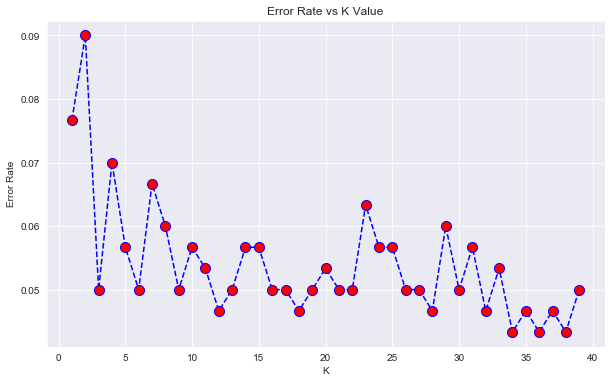

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As you can see the error rate changes based on the value of K. We can go up as high near K=35 to get a low error for the lecturer stated that he didn't like how bouncy it was before that so we are going with K=17. Honestly the error was already pretty low. 

In [29]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Now we are a little more accurate (95% vs 92%). 